In [1]:
import numpy as np
import pandas as pd

import torch

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rc('font', size=22)

In [4]:
import sys

In [5]:
from copy import deepcopy

In [6]:
sys.path.append('../')
sys.path.append('../../')

In [7]:
train_target = pd.read_csv('../data/train_target.csv')
train_target['client_id'] = train_target['client_id'].astype(str)
train_target.head(5)

,client_id,bins
0,24662,2
1,1046,0
2,34089,2
3,34848,1
4,47076,3


In [8]:
df_vectors = pd.read_pickle('../data/mles_embeddings.pickle').set_index('client_id')
embedding_columns = df_vectors.columns.tolist()
df_vectors = pd.merge(df_vectors, train_target.set_index('client_id'), left_index=True, right_index=True)
df_vectors.head()

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v791,v792,v793,v794,v795,v796,v797,v798,v799,bins
client_id,,,,,,,,,,,,,,,,,,,,,
10096,-0.000347,-0.001745,0.000375,0.000015,0.107360,0.000765,0.000785,-0.000082,-0.000348,0.003136,...,0.002197,0.008522,-0.001136,0.002078,-0.108685,0.001395,-0.082178,-0.002448,0.000712,0
10146,0.002378,-0.005872,0.000503,0.000540,0.107317,0.001321,0.000583,0.000719,-0.000259,0.005111,...,0.002867,-0.029075,0.002553,0.002546,-0.112349,0.001015,-0.013358,0.000819,0.000624,3
10351,-0.000527,-0.001270,-0.001823,-0.001187,0.090443,0.013755,0.002879,0.000214,-0.000245,-0.002579,...,-0.001943,0.041292,-0.003049,0.001670,-0.099858,0.001555,-0.109989,0.006911,0.004668,3
1059,0.000231,-0.004561,0.000477,0.000115,0.090608,-0.001923,-0.012453,-0.000032,-0.000244,0.000057,...,0.012989,0.023463,0.000170,0.003266,-0.099287,0.000009,-0.061852,-0.000800,-0.001640,1
10765,-0.000617,-0.003605,0.000309,-0.000029,0.089627,0.001649,0.001009,0.000686,-0.003835,0.000021,...,0.002721,-0.002837,0.000667,0.002930,-0.106495,0.000579,-0.097133,-0.000003,0.000701,1


In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [10]:
df_pca = df_vectors.copy()

In [11]:
pca = PCA(n_components=32)
pca.fit(df_pca[embedding_columns].values)
np.sum(pca.explained_variance_ratio_)

0.828271

In [12]:
pca_results = pca.transform(df_pca[embedding_columns].values)
df_pca['_pca_x'] = pca_results[:, 0]
df_pca['_pca_y'] = pca_results[:, 1]

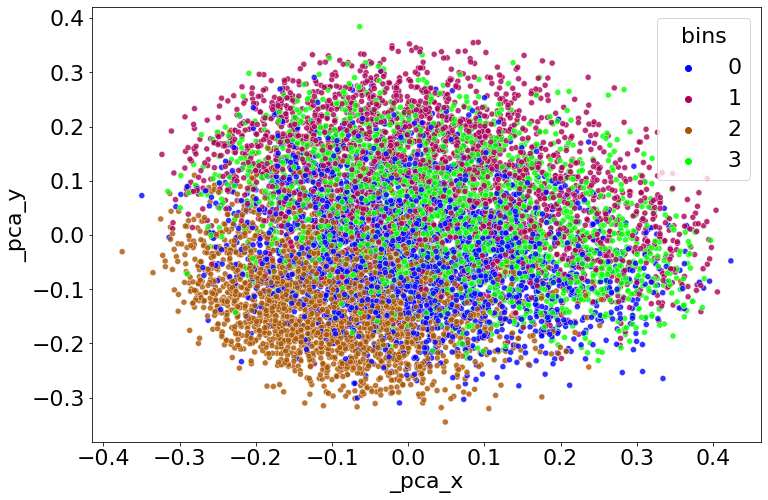

In [13]:
_, axs = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(
    x='_pca_x', y='_pca_y',
    hue='bins',
    # style='bins',
    data=df_pca.sample(n=10000),
    palette='brg',
    alpha=0.8,
    ax=axs,
    markers=['o', 'd', '*' , '.']
)
plt.show()

Относительный порядок категорий: 1 - 3 - 0 - 2

In [14]:
if len(df_pca) > 40000:
    df_tsne = df_pca.sample(n=40000).copy()
else:
    df_tsne = df_pca.copy()

In [15]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300, metric='cosine')
tsne_results = tsne.fit_transform(df_tsne[embedding_columns].values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.016s...
[t-SNE] Computed neighbors for 30000 samples in 17.888s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

In [16]:
df_tsne['tSNE[0]'] = tsne_results[:, 0]
df_tsne['tSNE[1]'] = tsne_results[:, 1]

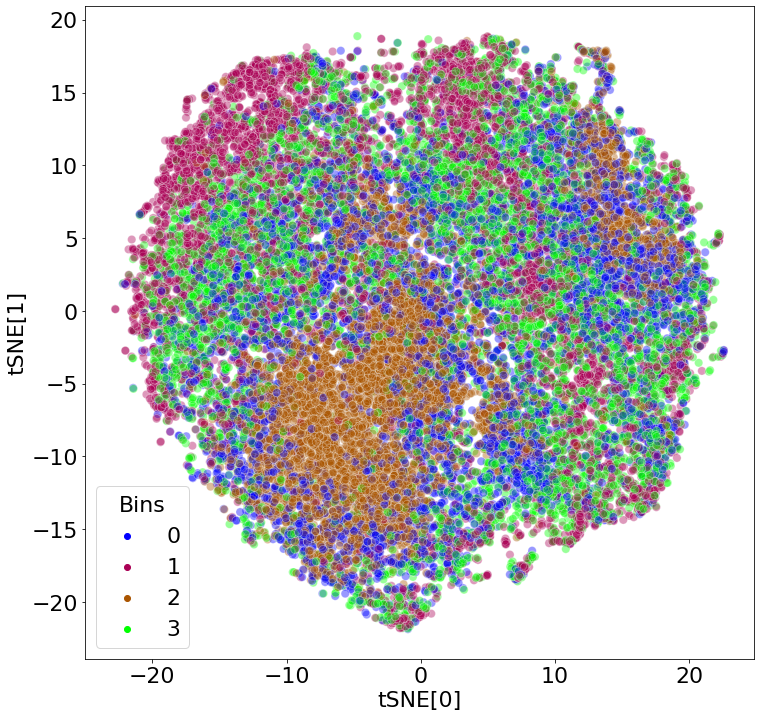

In [18]:
_, axs = plt.subplots(1, 1, figsize=(12, 12))
sns.scatterplot(
    x='tSNE[0]', y='tSNE[1]',
    hue='Bins',
    data=df_tsne.rename(columns={'bins': 'Bins'}),
    palette='brg',
    alpha=0.4, s=70,  
    ax=axs,
)
# plt.show()

plt.savefig('iclr-age-pred-tsne.pdf')